In [1]:
# Make the necessary imports
import numpy as np
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.operators.selection.rnd import RandomSelection
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.core.callback import Callback
from LHFiD import LHFID

# Disable the speedup warning
from pymoo.config import Config
Config.warnings['not_compiled'] = False

# Execution starts
# LHFiD initialized successfully
# Generation: 100
# Generation: 200
# Generation: 300
# Generation: 400
# Generation: 500
# Generation: 600
# Generation: 700
# Generation: 800
# The algorithm terminated after 865 generations.


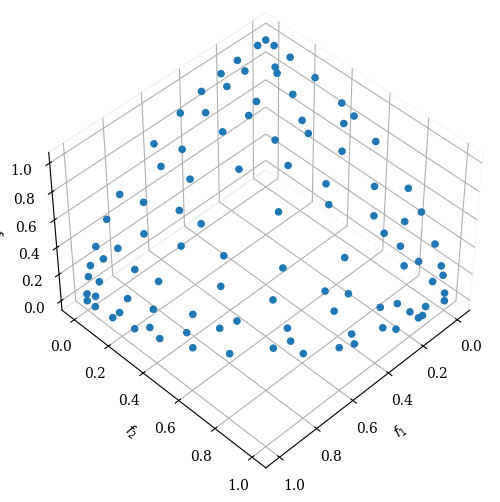

In [2]:
M = 3

problem = get_problem('dtlz4',n_obj=M,n_var=M-1+20)

ref_dirs = get_reference_directions('das-dennis',3,n_partitions=13)
algorithm = LHFID(pop_size=len(ref_dirs), 
                    ref_dirs= ref_dirs,
                    crossover= SBX(prob=0.9,eta=20),
                    selection= RandomSelection(),
                    mutation= PM(prob=1/problem.n_var,eta=20),
                    eliminate_duplicates=True
                    )

res = minimize(problem,
                algorithm,
                ('n_gen', 10000),
                seed=42
                )

Scatter().add(res.F).show()